QUERYING THE SERVER

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
URL = 'http://192.168.178.132:8090/getFactory'
r = requests.get(url = URL)
factorydata = r.json()

In [3]:
URLb = 'http://192.168.178.132:8090/getBelts'
b = requests.get(url = URLb)
beltdata = b.json()

In [4]:
URLp = 'http://192.168.178.132:8090/getProdStats'
p = requests.get(url = URLp)
proddata = p.json()

In [5]:
URLn = 'http://192.168.178.132:8090/getResourceNode'
n = requests.get(url = URLn)
datan = n.json()

VISUALIZING 'GETFACTORY' NODE

In [6]:
factorydf = pd.DataFrame(factorydata)
coordinates = []
for coord in factorydf.location:
    coordinates.append(coord)

In [7]:
coordin = pd.DataFrame(coordinates)
coordin['machine'] = factorydf['building']

In [8]:
coordin['machine']

0     Constructor
1     Constructor
2     Constructor
3     Constructor
4     Constructor
5     Constructor
6     Constructor
7     Constructor
8     Constructor
9     Constructor
10    Constructor
11    Constructor
12    Constructor
13    Constructor
14    Constructor
15    Constructor
16    Constructor
17    Constructor
18    Constructor
19    Constructor
20    Constructor
21    Constructor
22    Constructor
23    Constructor
24    Constructor
25    Constructor
26    Constructor
27    Constructor
28        Smelter
29        Smelter
30        Smelter
31        Smelter
32        Smelter
33        Smelter
34        Smelter
35        Smelter
36        Smelter
37        Smelter
38        Smelter
39        Foundry
40        Foundry
41      Assembler
42      Assembler
43      Assembler
44      Assembler
45      Assembler
46      Assembler
47      Assembler
48      Assembler
49      Assembler
50      Assembler
51      Assembler
52      Assembler
Name: machine, dtype: object

In [9]:
coordinlist = coordin['machine'].to_list()

In [10]:
coordinlist[0]

'Constructor'

In [11]:
fc = 0
sc = 0 
cc = 0
ac = 0

for mc in range(len(coordinlist)):
    if coordinlist[mc] == 'Foundry':
        fc+=1
    elif coordinlist[mc] == 'Smelter':
        sc+=1
    elif coordinlist[mc] == 'Constructor':
        cc+=1
    else:
        ac+=1
        
mccount = [fc, sc, cc, ac]

In [12]:
mccount

[2, 11, 28, 12]

PRIMARY MACHINE PLOT

No handles with labels found to put in legend.


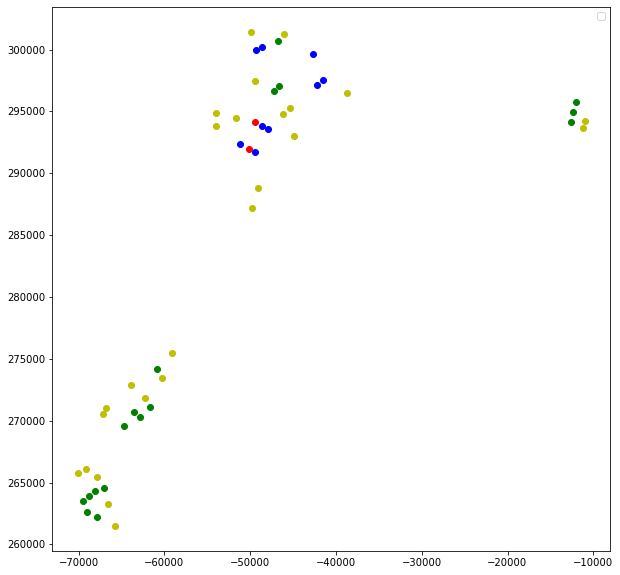

In [13]:
labels = ['Smelter', 'Constructor', 'Assembler', 'Foundry']
plt.figure(figsize = (10,10))

plt.plot(coordin['x'][:mccount[0]], coordin['y'][:mccount[0]], 'ro', coordin['x'][mccount[0]:mccount[1]], coordin['y'][mccount[0]:mccount[1]], 'bo', 
        coordin['x'][mccount[1]:mccount[2]], coordin['y'][mccount[1]:mccount[2]], 'go', coordin['x'][mccount[2]:], coordin['y'][mccount[2]:], 'yo')
#plt.legend()
plt.show()

BELT DATA AND VISUALIZATION

In [14]:
beltdf = pd.DataFrame(beltdata)

beltcoord0 = []
for bcoord in beltdf.location0:
    beltcoord0.append(bcoord)
    
belt0 = pd.DataFrame(beltcoord0)
    
beltcoord1 = []
for bcoord in beltdf.location1:
    beltcoord1.append(bcoord)
    
belt1 = pd.DataFrame(beltcoord1)

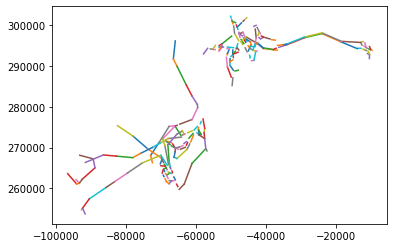

In [15]:
for i in range(len(belt0)):
    plt.plot([belt0['x'][i], belt1['x'][i]], [belt0['y'][i], belt1['y'][i]])

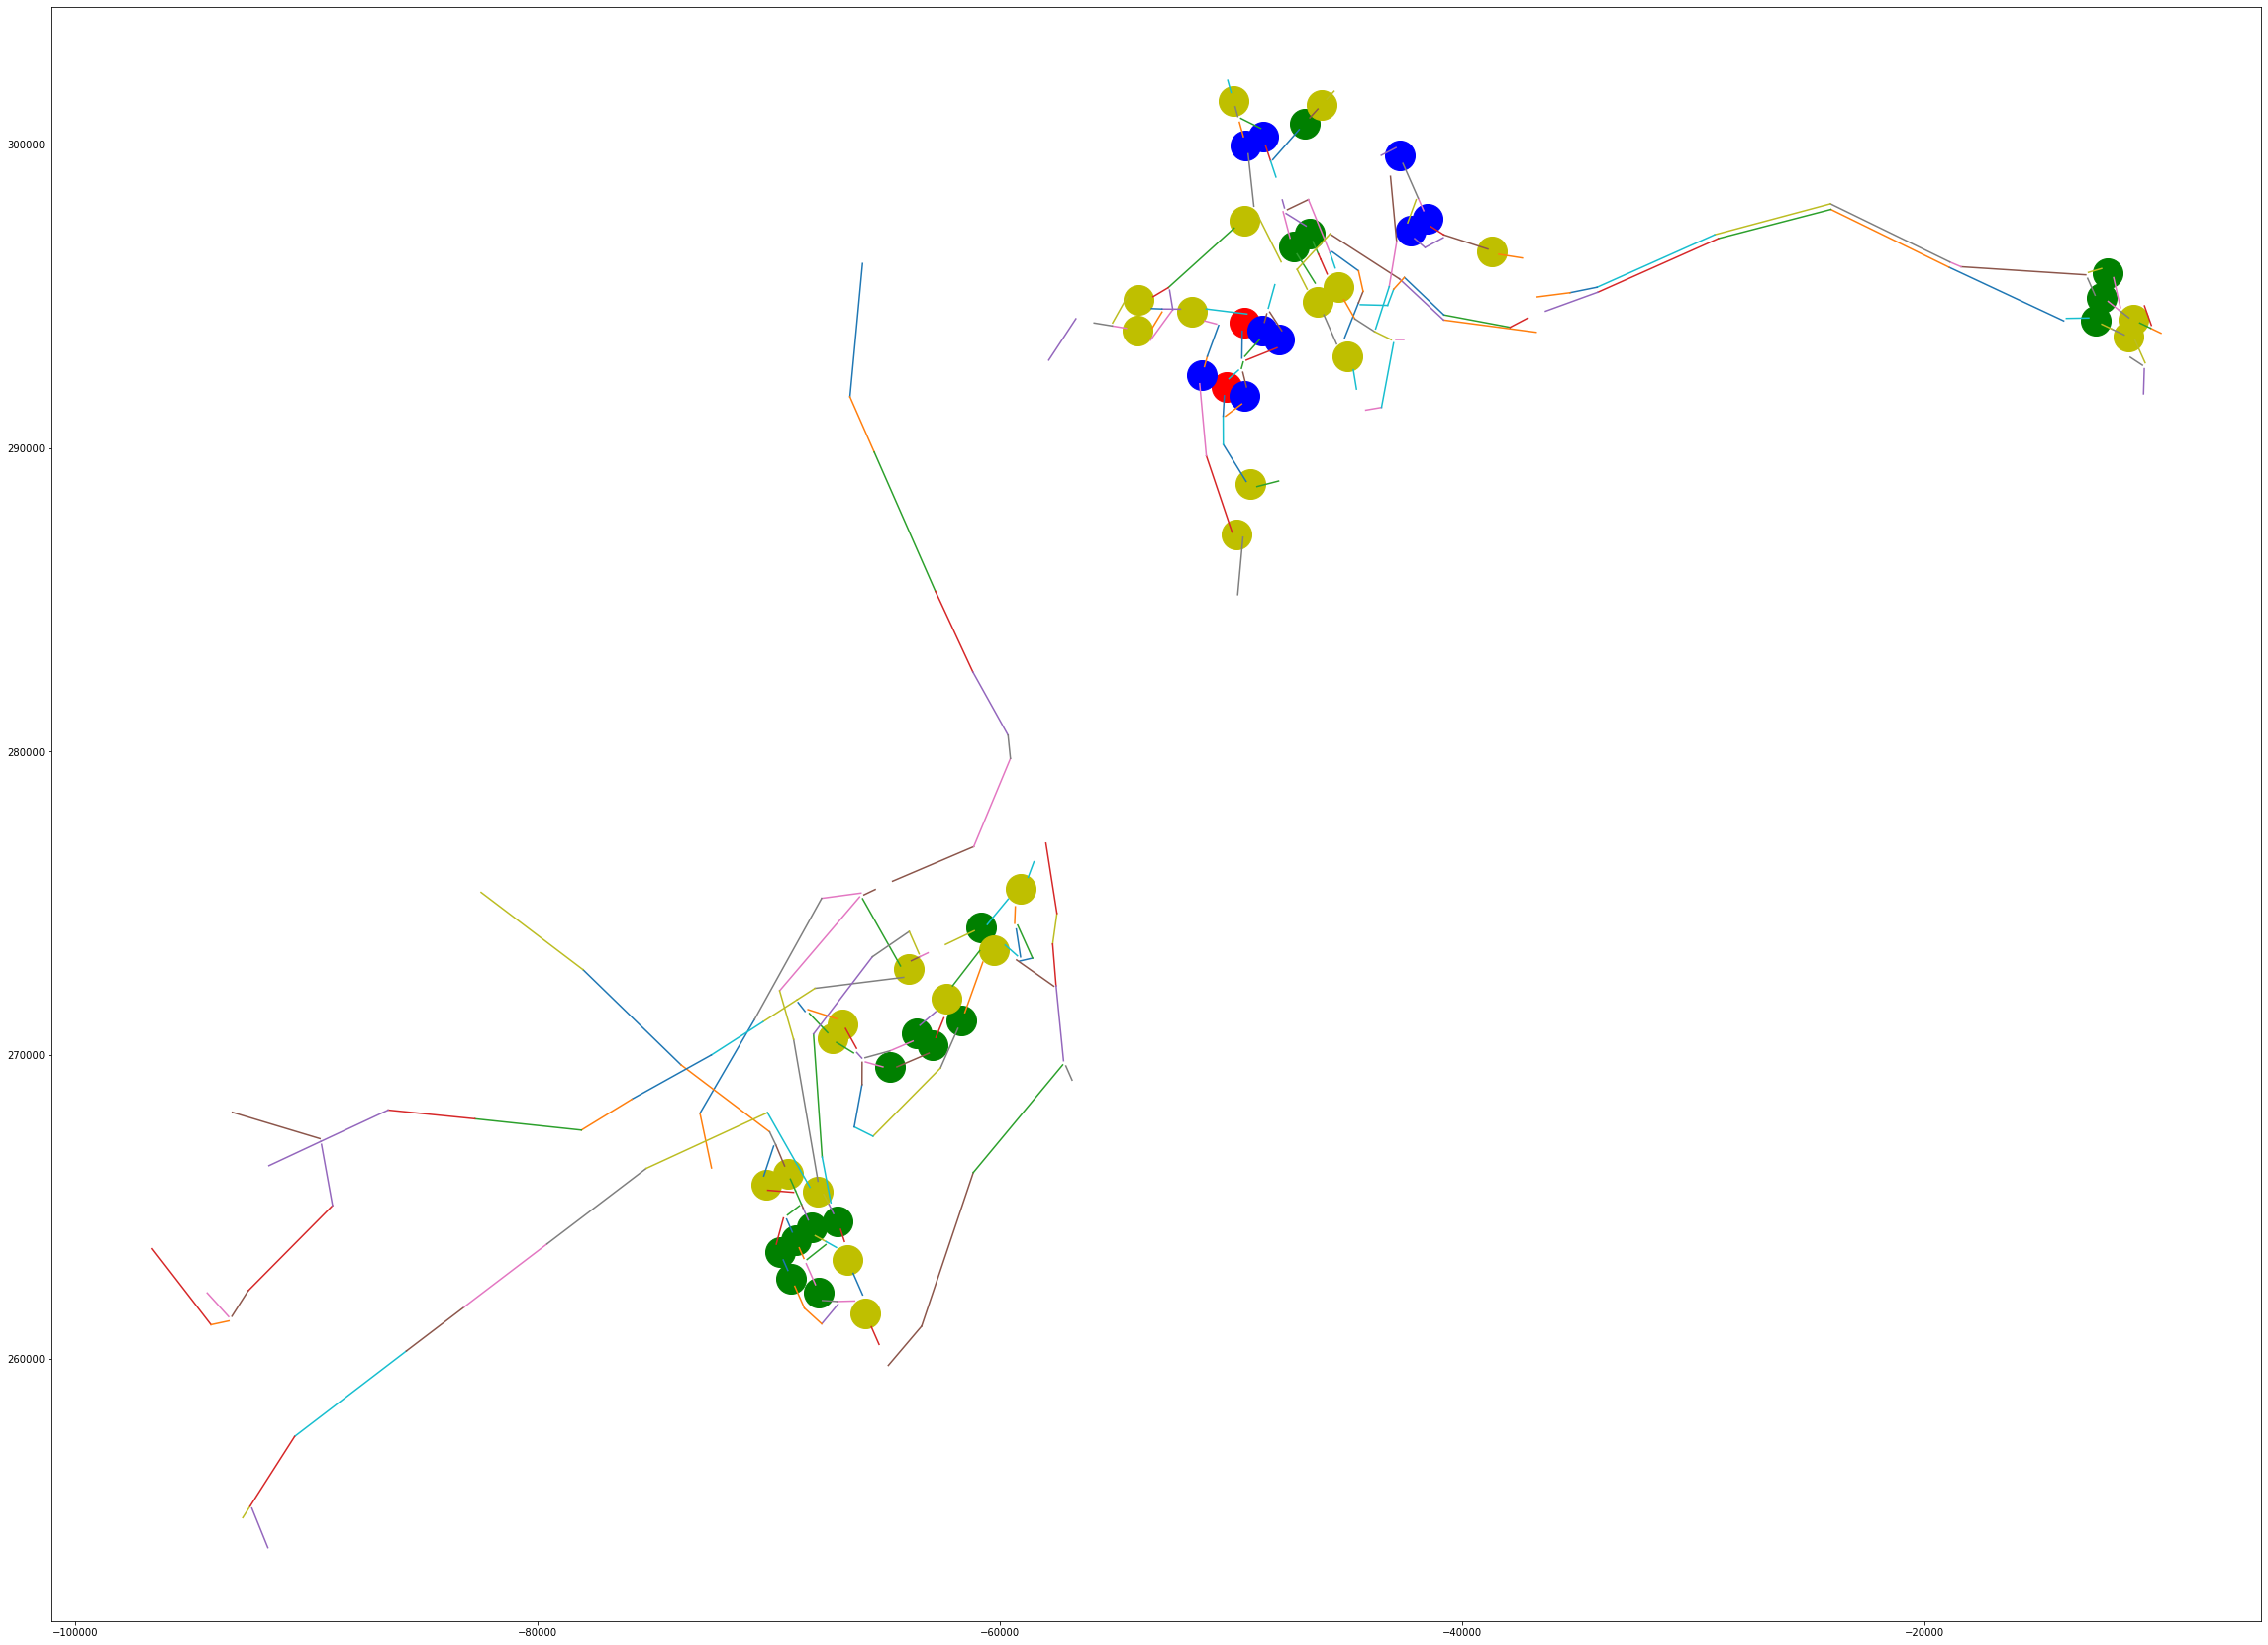

In [16]:
plt.figure(figsize = (40,30))

plt.plot(coordin['x'][:mccount[0]], coordin['y'][:mccount[0]], 'ro',
         coordin['x'][mccount[0]:mccount[1]], coordin['y'][mccount[0]:mccount[1]], 'bo',
         coordin['x'][mccount[1]:mccount[2]], coordin['y'][mccount[1]:mccount[2]], 'go',
         coordin['x'][mccount[2]:], coordin['y'][mccount[2]:], 'yo', markersize = 30)

for i in range(len(belt0)):
    plt.plot([belt0['x'][i], belt1['x'][i]], [belt0['y'][i], belt1['y'][i]])
    
#plt.legend()
plt.show()

MINING MACHINES VISUALIZATION

In [17]:
miners = []
mineore = []

for nn in range(len(datan)):
    if datan[nn]['Exploited']:
        miners.append(datan[nn]['location'])
        mineore.append(datan[nn]['NodeName'])
        
minerdf = pd.DataFrame(miners, mineore)

In [18]:
minerdf

,x,y,z
Iron Ore,-94905.468750,262677.500000,-4620.156738
Iron Ore,-97178.421875,264232.125000,-4625.651855
Iron Ore,-91267.710938,253077.453125,-4513.923828
Copper Ore,-83133.632812,275762.218750,-6264.252441
Iron Ore,-93267.109375,254146.171875,-4509.763672
Iron Ore,-94006.570312,268116.218750,-3127.726318
Iron Ore,-92372.078125,266081.843750,-3125.044189
Iron Ore,-44922.046875,302273.562500,-2573.118164
Iron Ore,-50406.527344,302870.718750,-2583.333252
Iron Ore,-8996.637695,293512.312500,-2527.247803


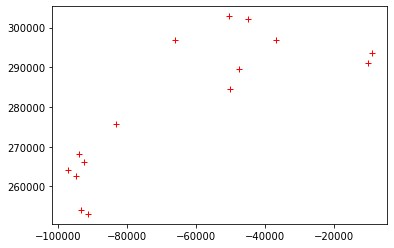

In [19]:
plt.plot(minerdf['x'], minerdf['y'], 'r+')

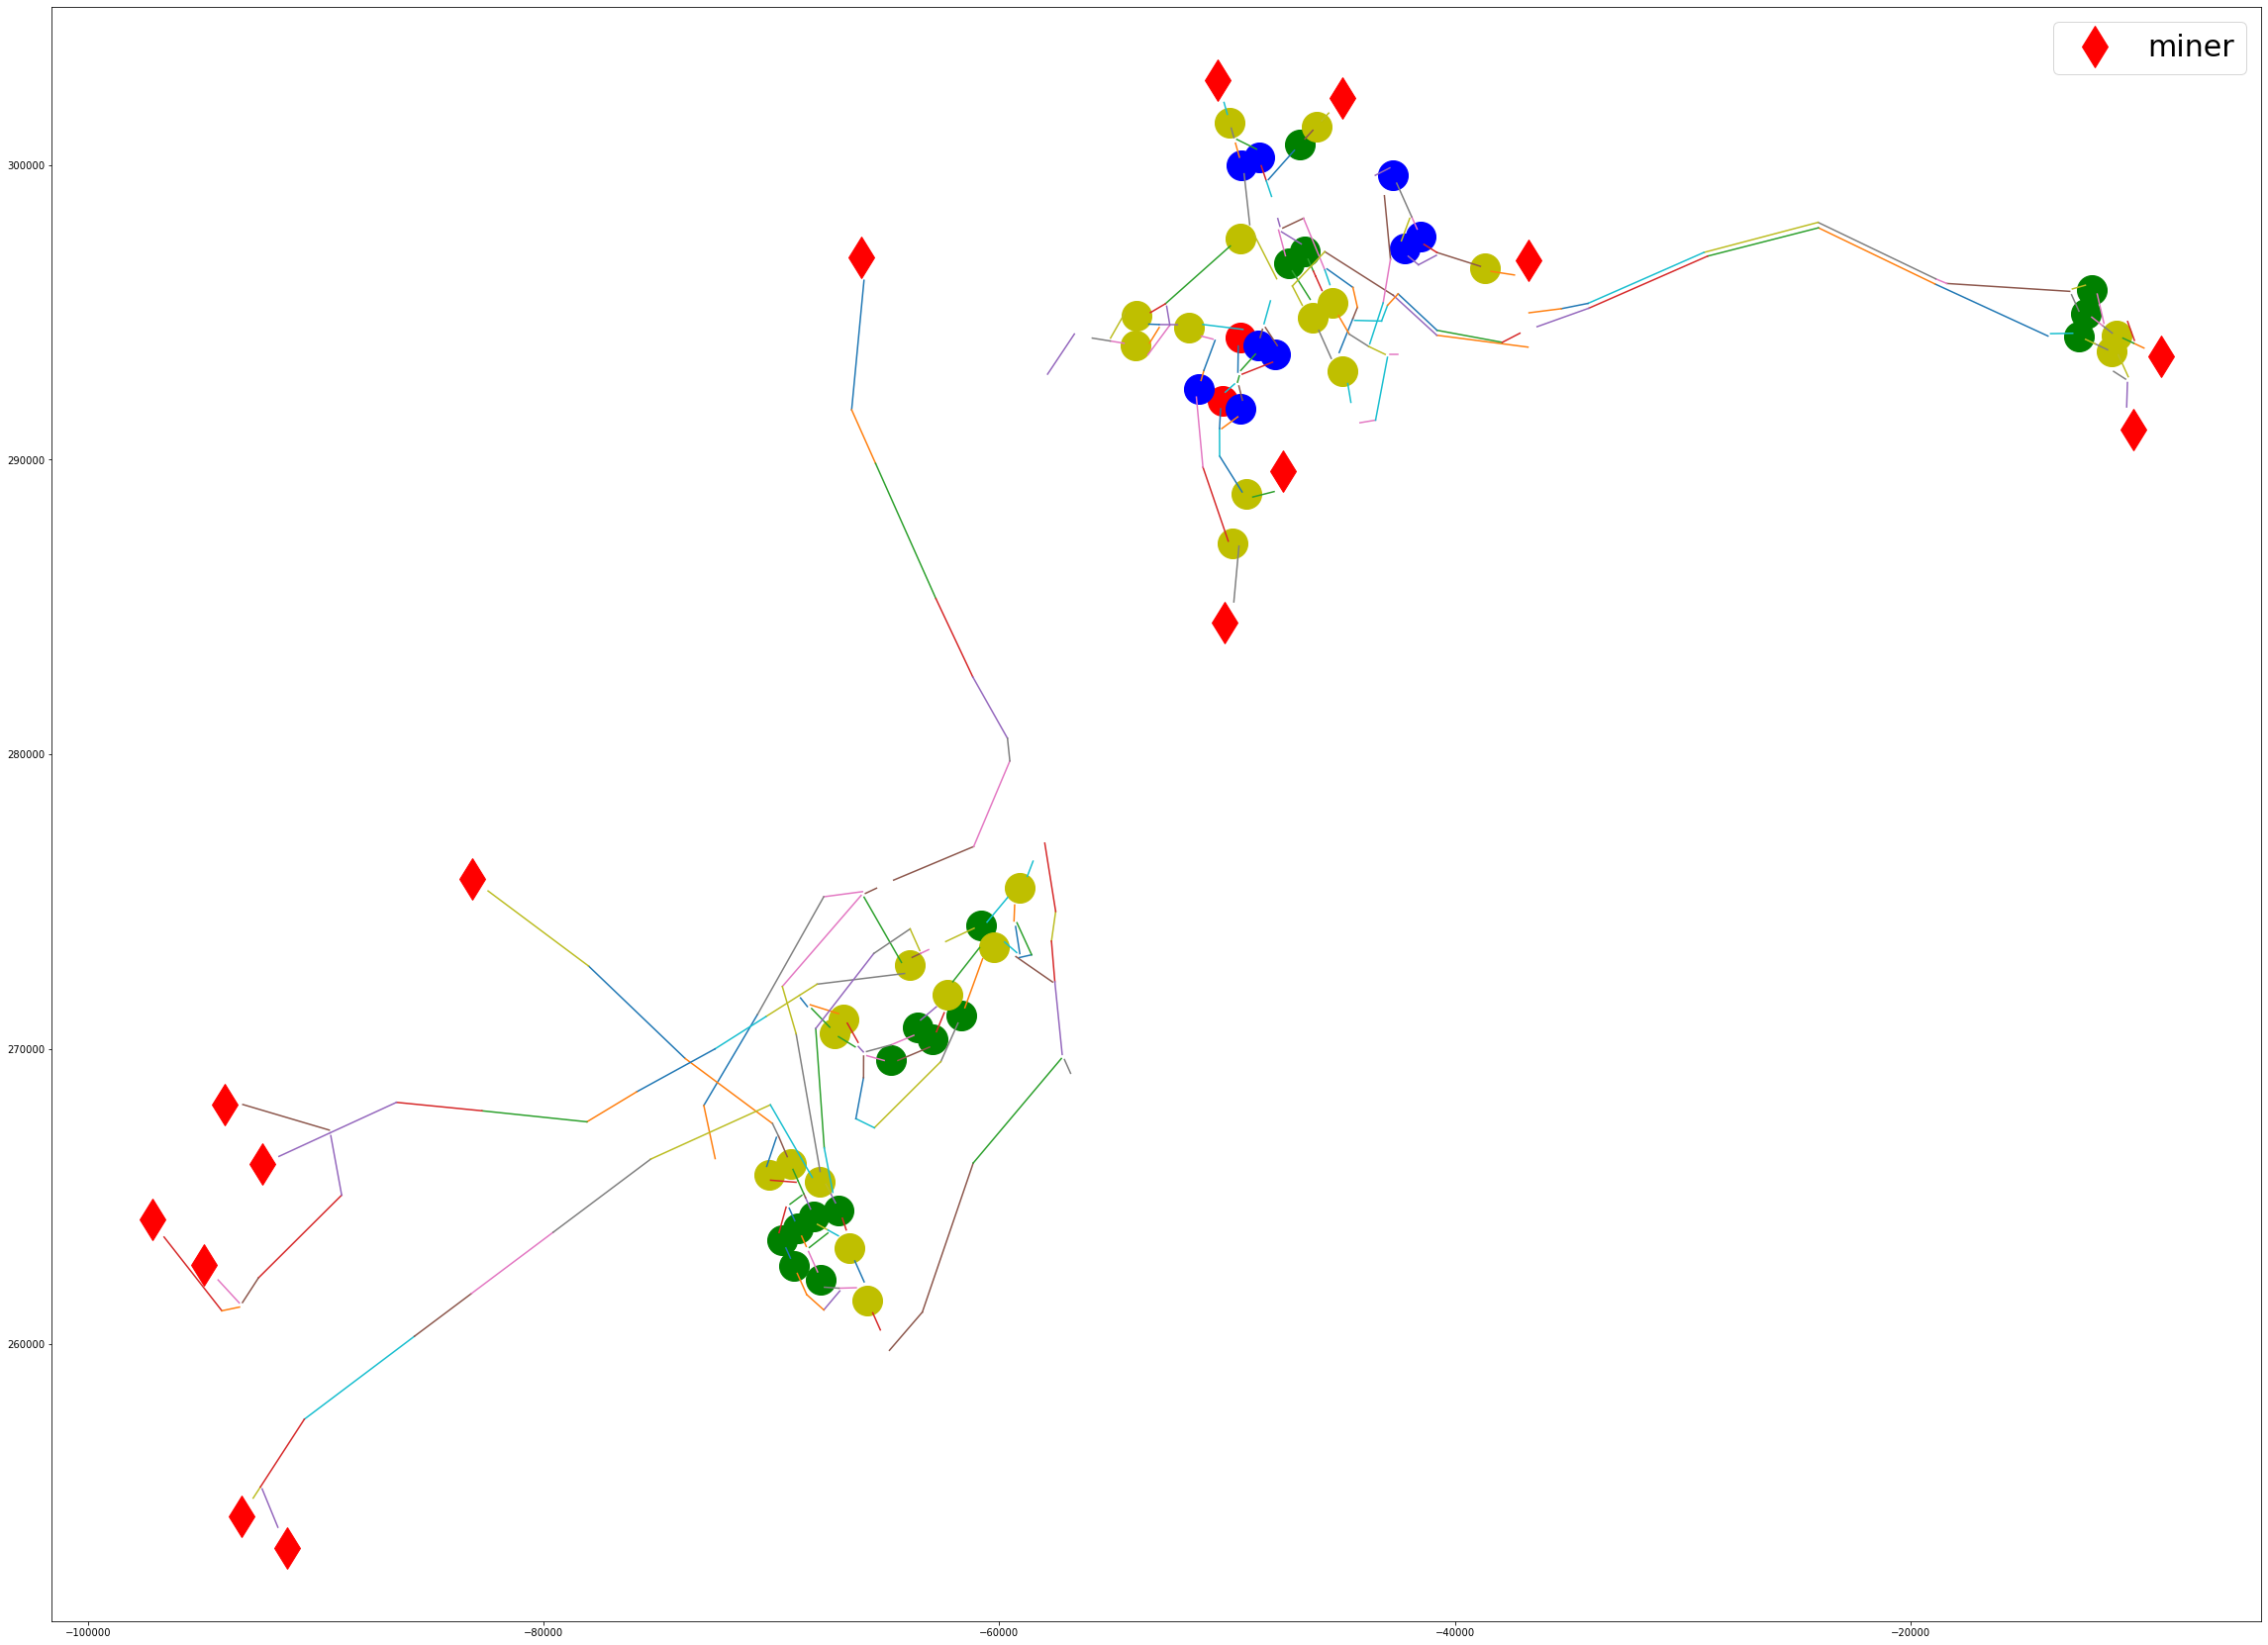

In [20]:
plt.figure(figsize = (40,30))

plt.plot(coordin['x'][:mccount[0]], coordin['y'][:mccount[0]], 'ro', #F
         coordin['x'][mccount[0]:mccount[1]], coordin['y'][mccount[0]:mccount[1]], 'bo', #S
         coordin['x'][mccount[1]:mccount[2]], coordin['y'][mccount[1]:mccount[2]], 'go', #C
         coordin['x'][mccount[2]:], coordin['y'][mccount[2]:], 'yo', markersize = 30) #A

for i in range(len(belt0)):
    plt.plot([belt0['x'][i], belt1['x'][i]], [belt0['y'][i], belt1['y'][i]])
    
plt.plot(minerdf['x'], minerdf['y'], 'rd', markersize = 30, label = 'miner')
    
plt.legend(fontsize = 30)
plt.show()

MARKING PRODUCTS WITH LOW PROD/CONS PERCENT ON MAP

In [21]:
proddata

[{'ItemName': 'Automated Wiring',
  'ProdPerMin': 'P: 2.0/3.0/min - C: 0.0/0.0/min',
  'ProdPercent': 75.29,
  'ConsPercent': 0,
  'CurrentProd': 2.0,
  'MaxProd': 3.0,
  'CurrentConsumed': 0.0,
  'MaxConsumed': 0.0,
  'Type': 'Belt'},
 {'ItemName': 'Biomass',
  'ProdPerMin': 'P: 0.0/0.0/min - C: 30.0/30.0/min',
  'ProdPercent': 0,
  'ConsPercent': 100,
  'CurrentProd': 0.0,
  'MaxProd': 0.0,
  'CurrentConsumed': 30.0,
  'MaxConsumed': 30.0,
  'Type': 'Belt'},
 {'ItemName': 'Cable',
  'ProdPerMin': 'P: 67.0/90.0/min - C: 38.0/50.0/min',
  'ProdPercent': 74.64,
  'ConsPercent': 75.29,
  'CurrentProd': 67.0,
  'MaxProd': 90.0,
  'CurrentConsumed': 38.0,
  'MaxConsumed': 50.0,
  'Type': 'Belt'},
 {'ItemName': 'Coal',
  'ProdPerMin': 'P: 79.0/120.0/min - C: 70.0/90.0/min',
  'ProdPercent': 65.49,
  'ConsPercent': 77.25,
  'CurrentProd': 79.0,
  'MaxProd': 120.0,
  'CurrentConsumed': 70.0,
  'MaxConsumed': 90.0,
  'Type': 'Belt'},
 {'ItemName': 'Copper Ingot',
  'ProdPerMin': 'P: 76.0/90.0/

In [35]:
test = factorydf.loc[factorydf['Recipe'] == 'Versatile Framework']['location'].tolist()
test1 = factorydf.loc[factorydf['Recipe'] == 'Modular Frame']['location'].tolist()
test2 = factorydf.loc[factorydf['Recipe'] == 'Smart Plating']['location'].tolist()
test3 = factorydf.loc[factorydf['Recipe'] == 'Automated Wiring']['location'].tolist()
#replace with any product name

In [23]:
test

[{'x': -59091.457031, 'y': 275474.28125, 'z': -3780.504395, 'rotation': 50}]

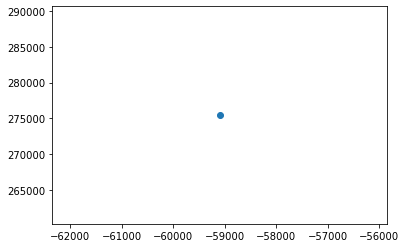

In [24]:
plt.scatter(test[0]['x'], test[0]['y'])

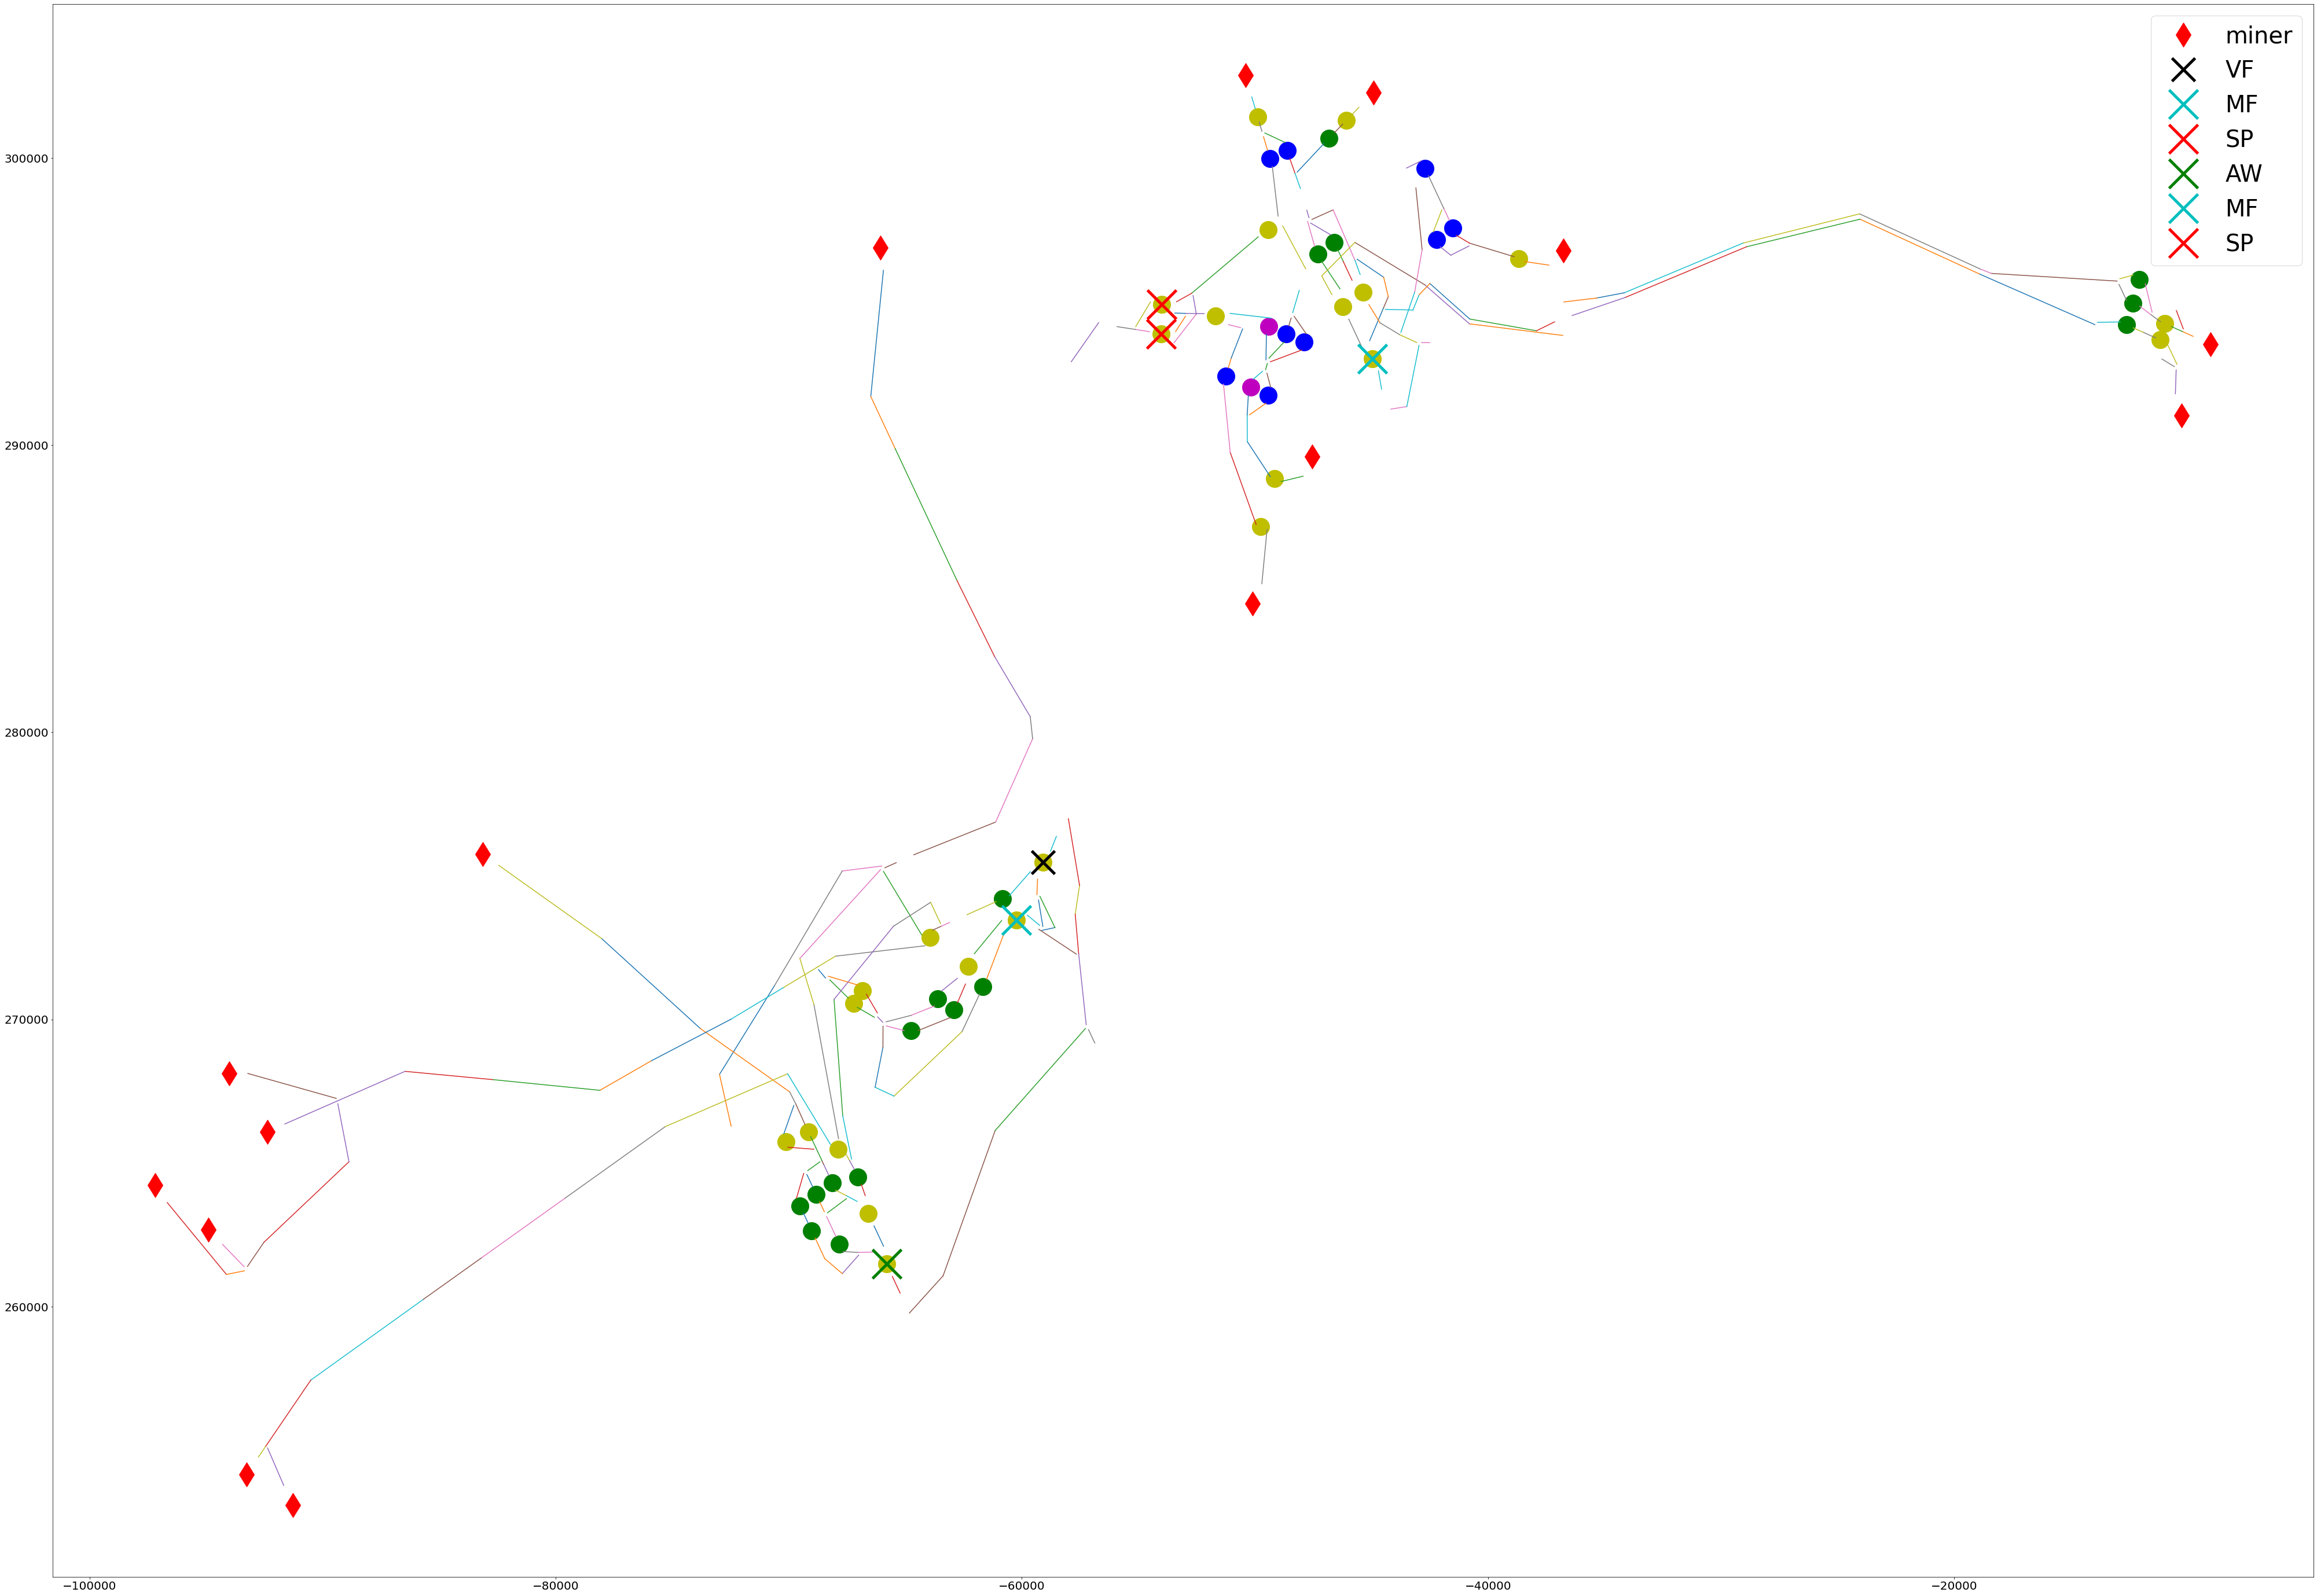

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize = (70,50))

matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

machineplot = plt.plot(coordin['x'][:mccount[0]], coordin['y'][:mccount[0]], 'mo',
         coordin['x'][mccount[0]:mccount[1]], coordin['y'][mccount[0]:mccount[1]], 'bo',
         coordin['x'][mccount[1]:mccount[2]], coordin['y'][mccount[1]:mccount[2]], 'go',
         coordin['x'][mccount[2]:], coordin['y'][mccount[2]:], 'yo', markersize = 30)



for i in range(len(belt0)):
    plt.plot([belt0['x'][i], belt1['x'][i]], [belt0['y'][i], belt1['y'][i]])
    
plt.plot(minerdf['x'], minerdf['y'], 'rd', markersize = 30, label = 'miner')

plt.plot(test[0]['x'], test[0]['y'], 'kx', label = 'VF', markersize = 40, mew = 5)
plt.plot(test1[0]['x'], test1[0]['y'], 'cx', label = 'MF', markersize = 50, mew = 5)
plt.plot(test2[1]['x'], test2[1]['y'], 'rx', label = 'SP', markersize = 50, mew = 5)
plt.plot(test3[0]['x'], test3[0]['y'], 'gx', label = 'AW', markersize = 50, mew = 5)
plt.plot(test1[1]['x'], test1[1]['y'], 'cx', label = 'MF', markersize = 50, mew = 5)
plt.plot(test2[0]['x'], test2[0]['y'], 'rx', label = 'SP', markersize = 50, mew = 5)
    
legend1 = plt.legend(iter(machineplot), ('Foundry', 'Smelter', 'Constructor', 'Assembler'), fontsize = 40)
legend2 = plt.legend(fontsize = 40)
plt.show()

plt.savefig('foo.png')

RAW MATERIAL MAP

In [26]:
nodedf = pd.DataFrame(datan)

In [27]:
nodedf1 = nodedf[['NodeName', 'location']]
nodedf1.sort_values('NodeName')

,NodeName,location
371,Bauxite,"{'x': 89592.648438, 'y': 62638.78125, 'z': 103..."
215,Bauxite,"{'x': -59322.132812, 'y': 14594.763672, 'z': 2..."
260,Bauxite,"{'x': 39477.648438, 'y': 52119.988281, 'z': 23..."
211,Bauxite,"{'x': 198936.421875, 'y': 93354.054688, 'z': 1..."
210,Bauxite,"{'x': 199007.171875, 'y': 89173.1875, 'z': 109..."
...,...,...
186,Sulfur,"{'x': -41961.570312, 'y': -94314.117188, 'z': ..."
312,Uranium,"{'x': 38000.171875, 'y': 91735.953125, 'z': -4..."
214,Uranium,"{'x': 168712.5625, 'y': 50839.164062, 'z': -9...."
336,Uranium,"{'x': -75893.15625, 'y': 51636.960938, 'z': 19..."


In [28]:
nodelist = pd.DataFrame(nodedf1['location'].tolist())

for material in nodedf1.NodeName.unique():
    if 

rawplot = plt.plot(coordin['x'][:mccount[0]], coordin['y'][:mccount[0]], 'mo',
         coordin['x'][mccount[0]:mccount[1]], coordin['y'][mccount[0]:mccount[1]], 'bo',
         coordin['x'][mccount[1]:mccount[2]], coordin['y'][mccount[1]:mccount[2]], 'go',
         coordin['x'][mccount[2]:], coordin['y'][mccount[2]:], 'yo', markersize = 30)

In [29]:
nodelist['Material'] = nodedf1['NodeName']

In [ ]:
nodelist1 = nodelist.loc[(nodelist['x'] <= coordin['x'].max()) & (nodelist['y'] <= coordin['y'].max())]
nodelist2 = nodelist1.loc[(coordin['x'].min() <= nodelist1['x'])  & (coordin['y'].min() <= nodelist1['x'])]

In [ ]:
nodelist2

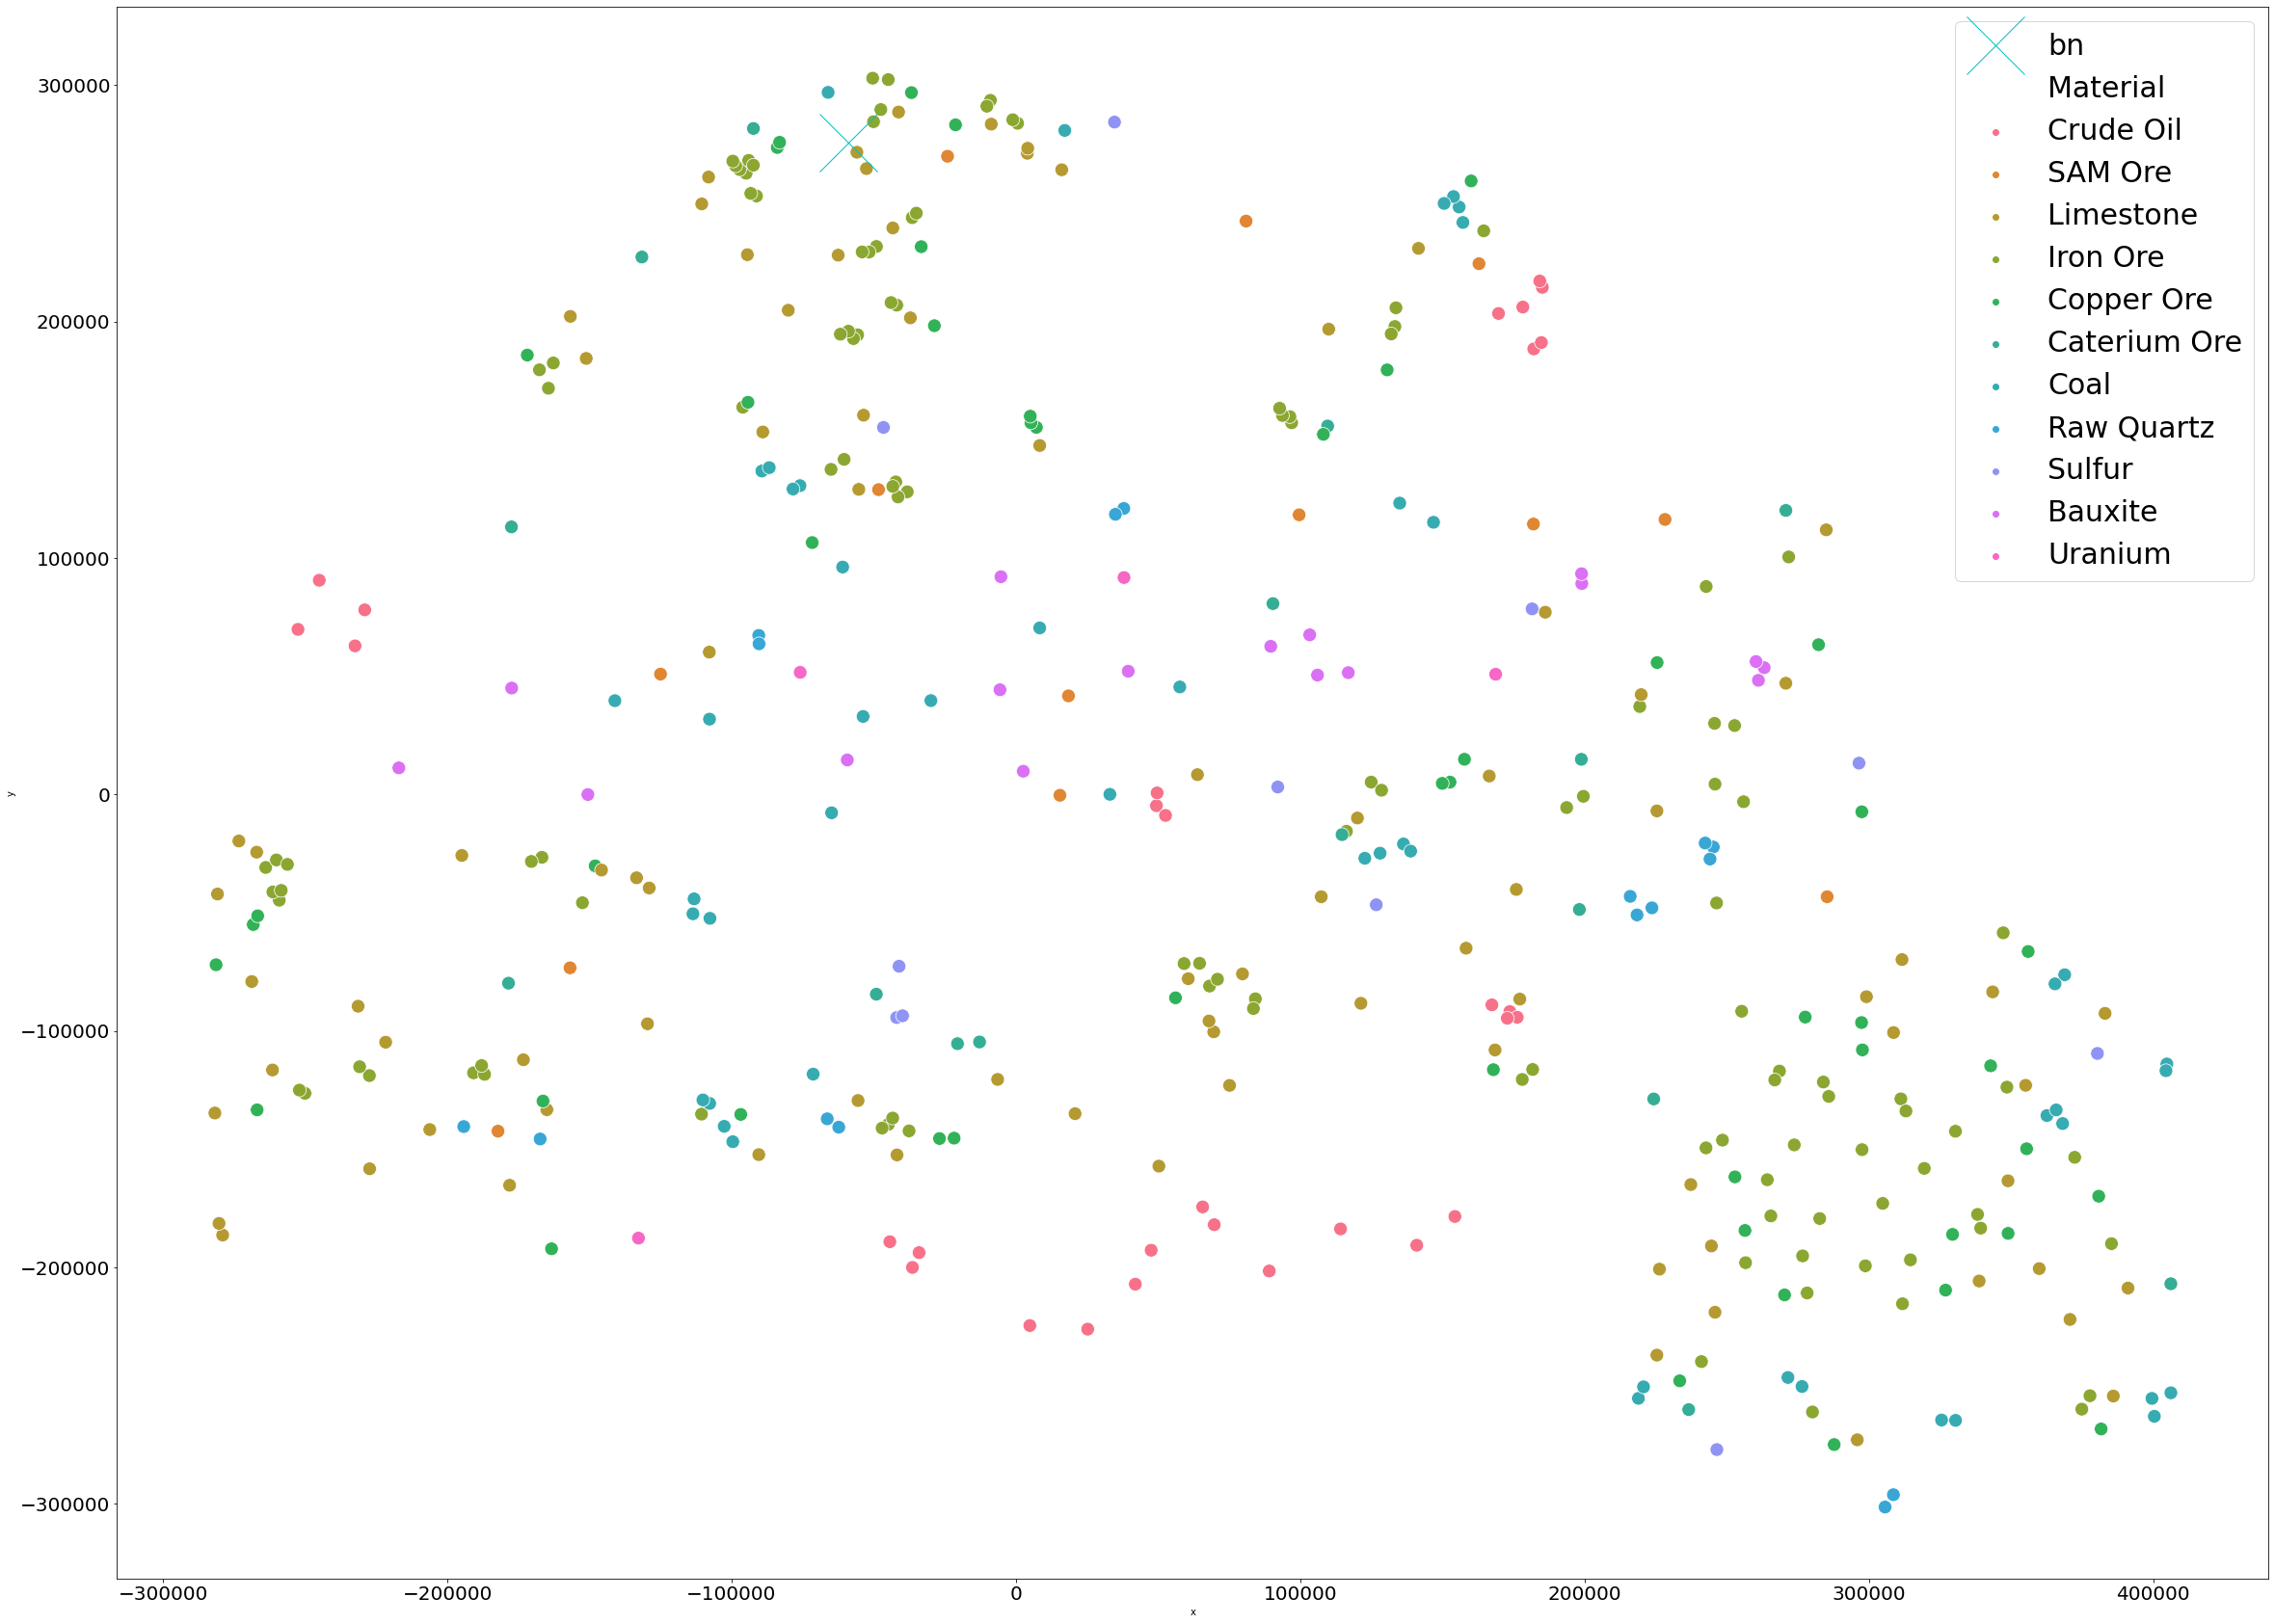

In [32]:
plt.figure(figsize = (40,30))

import seaborn as sns
sns.scatterplot(x = nodelist['x'], y = nodelist['y'], data = nodelist, hue = nodelist['Material'], s = 200)

plt.plot(test[0]['x'], test[0]['y'], 'cx', label = 'bn', markersize = 60)

#plt.xlim([coordin['x'].min(), coordin['x'].max()])
#plt.ylim([coordin['y'].min(), coordin['y'].max()])
plt.legend(fontsize = 30)
plt.show()

In [ ]:
coordin['y'].min(), coordin['y'].max()

In [ ]:
plt.figure(figsize = (40,30))

import seaborn as sns
sns.scatterplot(x = nodelist2['x'], y = nodelist2['y'], data = nodelist2, hue = nodelist2['Material'], s = 200)

plt.plot(test[0]['x'], test[0]['y'], 'cx', label = 'bn', markersize = 60)

plt.legend(fontsize = 30)
plt.show()

nodelist['Material'].tolist()
materials = []
for m in nodelist['Material'].tolist():
    if m not in materials:
        materials.append(m)

plt.figure(figsize = (40,30))

matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

machineplot = plt.plot(coordin['x'][:mccount[0]], coordin['y'][:mccount[0]], 'mo',
         coordin['x'][mccount[0]:mccount[1]], coordin['y'][mccount[0]:mccount[1]], 'bo',
         coordin['x'][mccount[1]:mccount[2]], coordin['y'][mccount[1]:mccount[2]], 'go',
         coordin['x'][mccount[2]:], coordin['y'][mccount[2]:], 'yo', markersize = 30)

In [ ]:
plt.figure(figsize = (40,30))

matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

machineplot = plt.plot(coordin['x'][:mccount[0]], coordin['y'][:mccount[0]], 'mo',
         coordin['x'][mccount[0]:mccount[1]], coordin['y'][mccount[0]:mccount[1]], 'bo',
         coordin['x'][mccount[1]:mccount[2]], coordin['y'][mccount[1]:mccount[2]], 'go',
         coordin['x'][mccount[2]:], coordin['y'][mccount[2]:], 'yo', markersize = 30)



for i in range(len(belt0)):
    plt.plot([belt0['x'][i], belt1['x'][i]], [belt0['y'][i], belt1['y'][i]])
    
plt.plot(minerdf['x'], minerdf['y'], 'rd', markersize = 30, label = 'miner')

plt.plot(test[0]['x'], test[0]['y'], 'cd', label = 'bn', markersize = 60)

import seaborn as sns
sns.scatterplot(nodelist['x'], nodelist['y'], data = nodelist, hue = nodelist['Material'], s = 200)
    
plt.legend(iter(machineplot), ('Foundry', 'Smelter', 'Constructor', 'Assembler'), fontsize = 40)
plt.show()

In [ ]:
nodelist['y'].max()

In [ ]:
coordin.type()

In [ ]:
coordin.to_csv('MachineData.csv')